In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.rename(columns={'Annual Income (k$)': 'Income','Spending Score (1-100)':'score'},inplace=True)
data

,CustomerID,Gender,Age,Income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
score         0
dtype: int64

In [7]:
data.isnull().values.any()

False

In [8]:
data.describe()

,CustomerID,Age,Income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


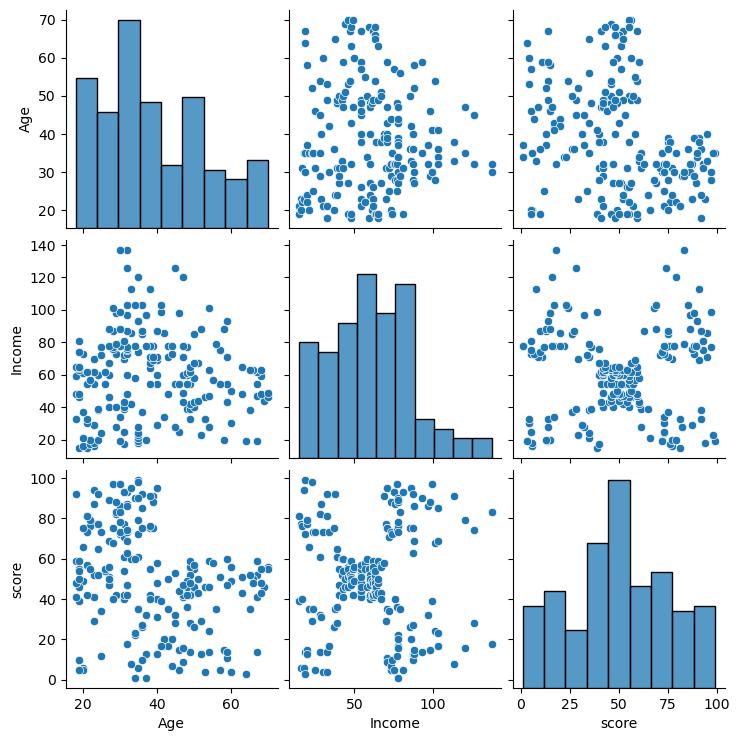

In [9]:
seaborn.pairplot(data[['Age','Income','score']])

In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans(n_clusters=5)

In [16]:
model = kmeans.fit(data[['score','Income']])

C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
model.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [18]:
data['income_cluster'] = kmeans.labels_

In [19]:
data

,CustomerID,Gender,Age,Income,score,income_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [20]:
data['income_cluster'].value_counts()

0    81
3    39
1    35
2    23
4    22
Name: income_cluster, dtype: int64

<AxesSubplot: xlabel='Income', ylabel='score'>

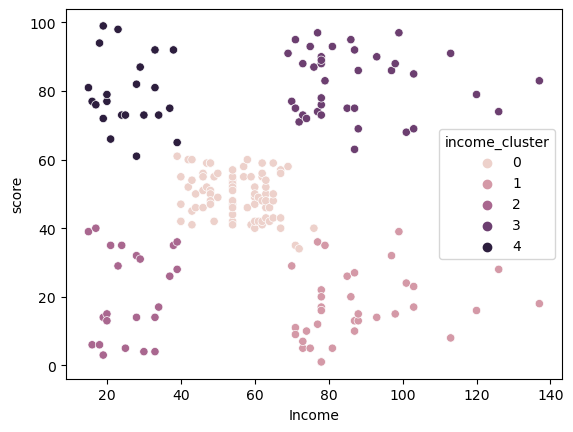

In [21]:
seaborn.scatterplot(x='Income',y='score',hue='income_cluster',data = data)

#### elbow method

In [24]:
from sklearn.cluster import KMeans

In [25]:
k_range = range(1,12)
wcss = []

In [26]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Income','score']])
    wcss.append(km.inertia_)

C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\.conda\envs\ForML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

In [27]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37442.24745037571,
 30552.71402546728,
 25015.36609059001,
 21838.86369282891,
 19669.710998301212,
 17515.872164701657]

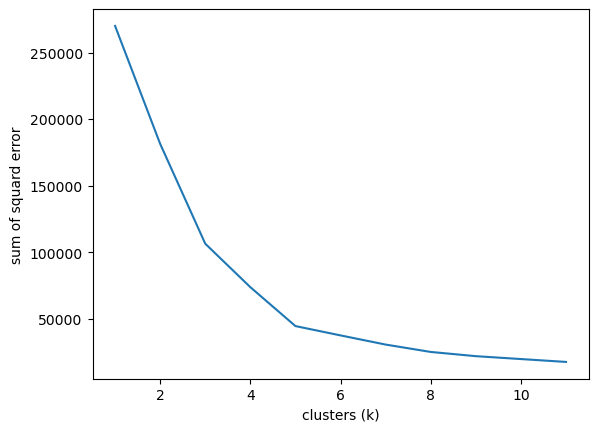

In [29]:
plt.xlabel('clusters (k)')
plt.ylabel('sum of squard error')
plt.plot(k_range,wcss)